In [24]:
import pandas as pd

data = pd.read_csv('./height_weight.csv', sep=';')
# Mænd = 0, kvinder = 1
pound2kg = 0.453592 
inch2cm = 2.54
data.Weight = data.Weight*pound2kg
data.Height = data.Height*inch2cm

X = data[['Weight', 'Height']]
y = data['Gender']

In [43]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA

clf = QDA(store_covariance = True)
clf.fit(X, y)

QuadraticDiscriminantAnalysis(store_covariance=True)

In [39]:
clf.means_

array([[ 84.83105737, 175.3269186 ],
       [ 61.62505131, 161.82028495]])

In [44]:
clf.covariance_

[array([[80.50707413, 56.31540107],
        [56.31540107, 52.89565713]]),
 array([[74.44996332, 50.20540713],
        [50.20540713, 46.90279325]])]

In [49]:
import matplotlib.pyplot as plt
decis = clf.decision_function(X)

In [119]:
X_weight = np.linspace(data.Weight.min(), data.Weight.max(), 200)
X_height = np.linspace(data.Height.min(), data.Height.max(), 200)

X_sample, Y_sample = np.meshgrid(X_weight, X_height)
X_new = pd.DataFrame(zip(np.ravel(X_sample), np.ravel(Y_sample)), columns=['Weight', 'Height'])

proba = clf.predict_proba(X_new)

Text(0.5, 0, 'Probability')

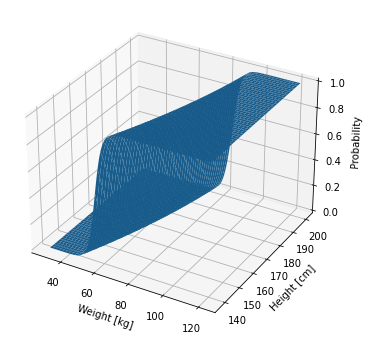

In [120]:
Z = proba[:, 0].reshape(X_sample.shape)

fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X_sample, Y_sample, Z)

ax.set_xlabel('Weight [kg]')
ax.set_ylabel('Height [cm]')
ax.set_zlabel('Probability')